In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# GroupBy on DataFrames

In [3]:
dframe = DataFrame({'k1': ['X', 'X', 'Y', 'Y', 'Z'],
                   'k2': ['alpha', 'beta', 'alpha', 'beta', 'alpha'],
                   'dataset1': np.random.randn(5),
                   'dataset2': np.random.randn(5)})
dframe

,dataset1,dataset2,k1,k2
0,0.681884,-1.051102,X,alpha
1,1.075864,-0.065263,X,beta
2,-0.356886,-0.608634,Y,alpha
3,-0.711399,0.949319,Y,beta
4,-0.799528,-0.188039,Z,alpha


In [4]:
# create group of dataset1 values grouped by k1 values
group1 = dframe['dataset1'].groupby(dframe['k1'])
group1

In [5]:
# mean of dataset1 by k1 values
group1.mean()

k1
X    0.878874
Y   -0.534143
Z   -0.799528
Name: dataset1, dtype: float64

In [7]:
cities = np.array(['NY', 'LA', 'LA', 'NY', 'NY'])
month = np.array(['JAN', 'FEB', 'JAN', 'FEB', 'JAN'])

In [9]:
# groups dataset1 values by cites, then month,
# then calculates means
dframe['dataset1'].groupby([cities, month]).mean()

LA  FEB    1.075864
    JAN   -0.356886
NY  FEB   -0.711399
    JAN   -0.058822
Name: dataset1, dtype: float64

In [12]:
# grabs both datasets and finds mean
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,0.878874,-0.558183
Y,-0.534143,0.170342
Z,-0.799528,-0.188039


In [13]:
# grabs k1, then k2, then calculates means in datasets
dframe.groupby(['k1', 'k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha  0.681884 -1.051102
   beta   1.075864 -0.065263
Y  alpha -0.356886 -0.608634
   beta  -0.711399  0.949319
Z  alpha -0.799528 -0.188039

In [14]:
# number of values in k1 + counts
dframe.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [15]:
# iterate over groups printing the name of the 'k1 value/group,
# then prints datasets and ks
for name, group in dframe.groupby('k1'):
    print "This is the %s group." %name
    print group
    print '/n'

This is the X group.
   dataset1  dataset2 k1     k2
0  0.681884 -1.051102  X  alpha
1  1.075864 -0.065263  X   beta
/n
This is the Y group.
   dataset1  dataset2 k1     k2
2 -0.356886 -0.608634  Y  alpha
3 -0.711399  0.949319  Y   beta
/n
This is the Z group.
   dataset1  dataset2 k1     k2
4 -0.799528 -0.188039  Z  alpha
/n


In [16]:
for (k1, k2), group in dframe.groupby(['k1', 'k2']):
    print "Key1 = %s Key2 = %s." %(k1, k2)
    print group
    print '/n'

Key1 = X Key2 = alpha.
   dataset1  dataset2 k1     k2
0  0.681884 -1.051102  X  alpha
/n
Key1 = X Key2 = beta.
   dataset1  dataset2 k1    k2
1  1.075864 -0.065263  X  beta
/n
Key1 = Y Key2 = alpha.
   dataset1  dataset2 k1     k2
2 -0.356886 -0.608634  Y  alpha
/n
Key1 = Y Key2 = beta.
   dataset1  dataset2 k1    k2
3 -0.711399  0.949319  Y  beta
/n
Key1 = Z Key2 = alpha.
   dataset1  dataset2 k1     k2
4 -0.799528 -0.188039  Z  alpha
/n


In [18]:
# create a dict? from groupby
group_dict = dict(list(dframe.groupby('k1')))
group_dict['X']

,dataset1,dataset2,k1,k2
0,0.681884,-1.051102,X,alpha
1,1.075864,-0.065263,X,beta


In [19]:
# separate data by datatype
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes, axis = 1)))
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0  0.681884 -1.051102
 1  1.075864 -0.065263
 2 -0.356886 -0.608634
 3 -0.711399  0.949319
 4 -0.799528 -0.188039, dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [20]:
# group dataset2 values by both keys and average shared values
dataset2_group = dframe.groupby(['k1', 'k2'])[['dataset2']]
dataset2_group.mean()

dataset2
k1 k2             
X  alpha -1.051102
   beta  -0.065263
Y  alpha -0.608634
   beta   0.949319
Z  alpha -0.188039

# GroupBy on Dict and Series

In [21]:
animals = DataFrame(np.arange(16).reshape(4,4),
                   columns = ['W', 'X', 'Y', 'Z'],
                   index = ['Dog', 'Cat', 'Bird', 'Mouse'])
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [23]:
# replace Cat column with some NaN
animals.ix[1:2,['W', 'Y']] = np.nan
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,NaN,5,NaN,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [25]:
# map of which behaviors are good and bad
behavior_map = {'W':'good', 'X':'bad', 'Y':'good', 'Z':'bad'}

# set column titles to behaviors and sum
animal_col = animals.groupby(behavior_map, axis = 1)
animal_col.sum()

,bad,good
Dog,4,2
Cat,12,NaN
Bird,20,18
Mouse,28,26


In [27]:
# create a series to map between old columns and behavior_map
behave_series = Series(behavior_map)
behave_series

W    good
X     bad
Y    good
Z     bad
dtype: object

In [28]:
# counts number of columns that applied, not values
animals.groupby(behave_series, axis = 1).count()

,bad,good
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2


In [29]:
# length of name, and if any are same then sum
animals.groupby(len).sum()

,W,X,Y,Z
3,0,6,2,10
4,8,9,10,11
5,12,13,14,15


In [30]:
keys = ['a','b','a','b']

# added sub row and max values make them all stay the same
animals.groupby([len,keys]).max()

W   X   Y   Z
3 a   0   1   2   3
  b NaN   5 NaN   7
4 a   8   9  10  11
5 b  12  13  14  15

In [33]:
# columns for dataframe, build a hierarchical index for dataframe
hier_col = pd.MultiIndex.from_arrays([['NY','NY','NY','SF','SF'],[1,2,3,1,2]],
                                    names=['City','sub_value'])

dframe_hr = DataFrame(np.arange(25).reshape(5,5),
                     columns=hier_col)
dframe_hr = dframe_hr * 100
dframe_hr

City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

# Aggregation

In [34]:
# aggregation - operations that result in a scalar

dframe_wine = pd.read_csv('winequality_red.csv',sep=';')
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [35]:
# average alcohol content for all wines
dframe_wine['alcohol'].mean()

10.422983114446502

In [36]:
# find max and subtract min array values
def max_to_min(arr):
    return arr.max() - arr.min()

# group by quality rating
wino = dframe_wine.groupby('quality')
wino.describe()

alcohol   chlorides  citric acid     density  fixed acidity  \
quality                                                                         
3       count   10.000000   10.000000    10.000000   10.000000      10.000000   
        mean     9.955000    0.122500     0.171000    0.997464       8.360000   
        std      0.818009    0.066241     0.250664    0.002002       1.770875   
        min      8.400000    0.061000     0.000000    0.994710       6.700000   
        25%      9.725000    0.079000     0.005000    0.996150       7.150000   
        50%      9.925000    0.090500     0.035000    0.997565       7.500000   
        75%     10.575000    0.143000     0.327500    0.998770       9.875000   
        max     11.000000    0.267000     0.660000    1.000800      11.600000   
4       count   53.000000   53.000000    53.000000   53.000000      53.000000   
        mean    10.265094    0.090679     0.174151    0.996542       7.779245   
        std      0.934776    0.076192     0.201030    0.001575       1.626624   
        min      9.000000    0.045000     0.000000    0.993400       4.600000   
        25%      9.600000    0.067000     0.030000    0.995650       6.800000   
        50%     10.000000    0.080000     0.090000    0.996500       7.500000   
        75%     11.000000    0.089000     0.270000    0.997450       8.400000   
        max     13.100000    0.610000     1.000000    1.001000      12.500000   
5       count  681.000000  681.000000   681.000000  681.000000     681.000000   
        mean     9.899706    0.092736     0.243686    0.997104       8.167254   
        std      0.736521    0.053707     0.180003    0.001589       1.563988   
        min      8.500000    0.039000     0.000000    0.992560       5.000000   
        25%      9.400000    0.074000     0.090000    0.996200       7.100000   
        50%      9.700000    0.081000     0.230000    0.997000       7.800000   
        75%     10.200000    0.094000     0.360000    0.997900       8.900000   
        max     14.900000    0.611000     0.790000    1.003150      15.900000   
6       count  638.000000  638.000000   638.000000  638.000000     638.000000   
        mean    10.629519    0.084956     0.273824    0.996615       8.347179   
        std      1.049639    0.039563     0.195108    0.002000       1.797849   
        min      8.400000    0.034000     0.000000    0.990070       4.700000   
        25%      9.800000    0.068250     0.090000    0.995402       7.000000   
        50%     10.500000    0.078000     0.260000    0.996560       7.900000   
        75%     11.300000    0.088000     0.430000    0.997893       9.400000   
        max     14.000000    0.415000     0.780000    1.003690      14.300000   
7       count  199.000000  199.000000   199.000000  199.000000     199.000000   
        mean    11.465913    0.076588     0.375176    0.996104       8.872362   
        std      0.961933    0.029456     0.194432    0.002176       1.992483   
        min      9.200000    0.012000     0.000000    0.990640       4.900000   
        25%     10.800000    0.062000     0.305000    0.994765       7.400000   
        50%     11.500000    0.073000     0.400000    0.995770       8.800000   
        75%     12.100000    0.087000     0.490000    0.997360      10.100000   
        max     14.000000    0.358000     0.760000    1.003200      15.600000   
8       count   18.000000   18.000000    18.000000   18.000000      18.000000   
        mean    12.094444    0.068444     0.391111    0.995212       8.566667   
        std      1.224011    0.011678     0.199526    0.002378       2.119656   
        min      9.800000    0.044000     0.030000    0.990800       5.000000   
        25%     11.325000    0.062000     0.302500    0.994175       7.250000   
        50%     12.150000    0.070500     0.420000    0.994940       8.250000   
        75%     12.875000    0.075500     0.530000    0.997200      10.225000   
        max     14.000000    0.086000     0.72000

In [37]:
# takes max value of column and subtracts min value of column
# passing aggregation
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31,40,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38,112,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65,149,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71,159,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51,282,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39,76,0.00800,0.84,0.47,4.2


In [38]:
# same for mean
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [40]:
# see if quality rating has to do with alcohol percentage
# make a new column dividing quality by alcohol
dframe_wine['qual/alc ratio'] = dframe_wine['quality'] / dframe_wine['alcohol']
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0.531915


In [41]:
# pivot table, ugh
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


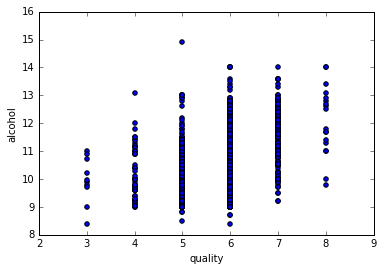

In [42]:
%matplotlib inline

# data better fit for a box plot
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

# Splitting Applying and Combining

In [45]:
# creates new column, applies a rank to each wine based on alcohol
# with 1 being the highest content
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df))+1
    return df

# highest is at the top of the list
dframe_wine.sort_values(by='alcohol',ascending=False,inplace=True)

dframe_wine = dframe_wine.groupby('quality').apply(ranker)
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22,71,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19,50,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,0.428571,1
144,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,0.428571,2
1270,5.0,0.38,0.01,1.6,0.048,26,60,0.99084,3.70,0.75,14.0,6,0.428571,3


In [46]:
# number of wines with each quality ranking
num_of_qual = dframe_wine['quality'].value_counts()
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [48]:
# show only wine ranking 1
dframe_wine[dframe_wine.alc_content_rank==1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22,71,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19,50,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16,42,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8,65,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6,11,0.99892,3.48,0.49,11.0,3,0.272727,1


# Cross Tabulation

In [50]:
from StringIO import StringIO

data="""\
Sample Animal Intelligence
1 Dog Smart
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart"""

pets = pd.read_table(StringIO(data),sep='\s+')
pets

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [51]:
# creates pivot table like frequency counter
pd.crosstab(pets.Animal,pets.Intelligence,margins=True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6
